In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Part 1: DataFrame Loading, Cleaning and Categorizing

In [44]:
carData = pd.read_csv('car_data.csv')
carData.sample(5)

,Unnamed: 0,LISTING_URL,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
1574,1574,https://www.sgcarmart.com/used_cars/info.php?I...,Honda,42800.0,15220.0,29-Sep-2016,79900.0,2016,682.0,Auto,16706.0,13/03/2024,18107.0,8107.0,46527.0,915.0,1496.0,1130.0,2.0,Stationwagon
3445,3445,https://www.sgcarmart.com/used_cars/info.php?I...,Kia,95800.0,14800.0,30-Mar-2011,NaN,2010,2124.0,Auto,21299.0,13/03/2024,23905.0,23905.0,32914.0,2348.0,2359.0,1838.0,3.0,SUV
1100,1100,https://www.sgcarmart.com/used_cars/info.php?I...,Honda,103800.0,12400.0,13-May-2022,11500.0,2021,578.0,Auto,61675.0,13/03/2024,15702.0,5000.0,70901.0,2959.0,1317.0,1070.0,1.0,Hatchback
836,836,https://www.sgcarmart.com/used_cars/info.php?I...,Audi,39800.0,14970.0,30-Nov-2015,160000.0,2015,976.0,Auto,25830.0,13/03/2024,29466.0,28253.0,60000.0,611.0,1798.0,1545.0,1.0,Luxury Sedan
539,539,https://www.sgcarmart.com/used_cars/info.php?I...,Audi,74800.0,15970.0,19-Jan-2018,67961.0,2017,392.0,Auto,33223.0,13/03/2024,24698.0,26578.0,41400.0,1100.0,999.0,1280.0,2.0,Luxury Sedan


In [45]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    3985 non-null   int64  
 1   LISTING_URL                   3985 non-null   object 
 2   BRAND                         3985 non-null   object 
 3   PRICE                         3971 non-null   float64
 4   DEPRE_VALUE_PER_YEAR          3892 non-null   float64
 5   REG_DATE                      3985 non-null   object 
 6   MILEAGE_KM                    3362 non-null   float64
 7   MANUFACTURED_YEAR             3985 non-null   object 
 8   ROAD_TAX_PER_YEAR             3937 non-null   float64
 9   TRANSMISSION                  3977 non-null   object 
 10  DEREG_VALUE_FROM_SCRAPE_DATE  3746 non-null   float64
 11  SCRAPE_DATE                   3985 non-null   object 
 12  OMV                           3323 non-null   float64
 13  ARF

In [47]:
car_data1 = carData.drop(['LISTING_URL', 'SCRAPE_DATE'],axis=1)
car_data1.dropna(inplace=True)

In [48]:
car_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2528 entries, 0 to 3983
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2528 non-null   int64  
 1   BRAND                         2528 non-null   object 
 2   PRICE                         2528 non-null   float64
 3   DEPRE_VALUE_PER_YEAR          2528 non-null   float64
 4   REG_DATE                      2528 non-null   object 
 5   MILEAGE_KM                    2528 non-null   float64
 6   MANUFACTURED_YEAR             2528 non-null   object 
 7   ROAD_TAX_PER_YEAR             2528 non-null   float64
 8   TRANSMISSION                  2528 non-null   object 
 9   DEREG_VALUE_FROM_SCRAPE_DATE  2528 non-null   float64
 10  OMV                           2528 non-null   float64
 11  ARF                           2528 non-null   float64
 12  COE_FROM_SCRAPE_DATE          2528 non-null   float64
 13  DAYS_OF_

In [49]:
car_data1.sample(5)

,Unnamed: 0,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
2279,2279,Mitsubishi,51800.0,14220.0,31-Mar-2017,91000.0,2017,1210.0,Auto,27252.0,16945.0,16945.0,53300.0,1102.0,1998.0,1417.0,1.0,SUV
2333,2333,Mercedes-Benz,47000.0,15410.0,01-Jun-2007,179000.0,2007,3573.0,Auto,15352.0,81044.0,89149.0,50347.0,1103.0,2997.0,1850.0,3.0,Luxury Sedan
2041,2041,Nissan,40800.0,13800.0,21-Mar-2016,125187.0,2015,1210.0,Auto,26650.0,24198.0,25878.0,55089.0,737.0,1997.0,1470.0,3.0,Luxury Sedan
579,579,Honda,72800.0,14850.0,06-Jun-2018,110000.0,2018,742.0,Auto,30224.0,19890.0,19890.0,38510.0,1523.0,1597.0,1249.0,2.0,Mid-Sized Sedan
1864,1864,Honda,119800.0,20880.0,01-Mar-2019,64428.0,2018,1630.0,Auto,39222.0,28661.0,32126.0,33689.0,1495.0,2356.0,1776.0,1.0,MPV


In [50]:
(car_data1['BRAND'].value_counts())

BRAND
Mercedes-Benz    338
BMW              318
Toyota           298
Honda            270
Audi             151
Volkswagen       126
Nissan            97
Porsche           96
Hyundai           83
Mazda             81
Subaru            70
Kia               69
Mitsubishi        58
Volvo             56
Lexus             55
MINI              32
Jaguar            25
Land              24
Skoda             21
Peugeot           18
Suzuki            17
SEAT              17
Maserati          15
Ferrari           15
Citroen           14
2018              14
Opel              12
Ford              12
Bentley           11
Infiniti          10
2016              10
Rolls-Royce       10
2019               9
Chevrolet          9
Lamborghini        9
2017               7
MG                 6
Renault            6
McLaren            5
2010               4
Aston              4
2020               4
Jeep               4
Alfa               3
2021               2
Ssangyong          2
Alpine             2
2015   

We noticed errors in the data, so we removed the values that were wrongly placed in the "BRAND" column.

In [51]:

car_data = car_data1[~car_data1.BRAND.str.contains(r'\d')]
car_data.sort_index()

car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2473 entries, 0 to 3983
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2473 non-null   int64  
 1   BRAND                         2473 non-null   object 
 2   PRICE                         2473 non-null   float64
 3   DEPRE_VALUE_PER_YEAR          2473 non-null   float64
 4   REG_DATE                      2473 non-null   object 
 5   MILEAGE_KM                    2473 non-null   float64
 6   MANUFACTURED_YEAR             2473 non-null   object 
 7   ROAD_TAX_PER_YEAR             2473 non-null   float64
 8   TRANSMISSION                  2473 non-null   object 
 9   DEREG_VALUE_FROM_SCRAPE_DATE  2473 non-null   float64
 10  OMV                           2473 non-null   float64
 11  ARF                           2473 non-null   float64
 12  COE_FROM_SCRAPE_DATE          2473 non-null   float64
 13  DAYS_OF_

In [52]:
car_data['BRAND'].value_counts()

BRAND
Mercedes-Benz    338
BMW              318
Toyota           298
Honda            270
Audi             151
Volkswagen       126
Nissan            97
Porsche           96
Hyundai           83
Mazda             81
Subaru            70
Kia               69
Mitsubishi        58
Volvo             56
Lexus             55
MINI              32
Jaguar            25
Land              24
Skoda             21
Peugeot           18
SEAT              17
Suzuki            17
Maserati          15
Ferrari           15
Citroen           14
Opel              12
Ford              12
Bentley           11
Rolls-Royce       10
Infiniti          10
Lamborghini        9
Chevrolet          9
MG                 6
Renault            6
McLaren            5
Aston              4
Jeep               4
Alfa               3
Alpine             2
Ssangyong          2
Mercedes           1
Chrysler           1
Daihatsu           1
RUF                1
Name: count, dtype: int64

Converting Transmission -> 1  for auto, 0  for manual

In [53]:
car_data['TRANSMISSION'].value_counts()

TRANSMISSION
Auto      2442
Manual      31
Name: count, dtype: int64

In [54]:
car_data['TRANSMISSION_CONVERT'] = car_data['TRANSMISSION'].apply(lambda x: 1 if x=='Auto' else 0)
car_data.drop('TRANSMISSION', axis=1, inplace=True)
car_data.rename(columns={'TRANSMISSION_CONVERT':"TRANSMISSION"},inplace=True)
car_data.sample(5)

C:\Users\tayka\AppData\Local\Temp\ipykernel_26876\2070663087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['TRANSMISSION_CONVERT'] = car_data['TRANSMISSION'].apply(lambda x: 1 if x=='Auto' else 0)
C:\Users\tayka\AppData\Local\Temp\ipykernel_26876\2070663087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data.drop('TRANSMISSION', axis=1, inplace=True)
C:\Users\tayka\AppData\Local\Temp\ipykernel_26876\2070663087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

,Unnamed: 0,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
818,818,Honda,72800.0,15210.0,02-May-2018,82728.0,2018,742.0,30934.0,19724.0,19724.0,41400.0,1498.0,1597.0,1249.0,3.0,Mid-Sized Sedan,1
1325,1325,Mercedes-Benz,79800.0,21800.0,05-Jan-2017,130000.0,2016,740.0,38017.0,35649.0,36909.0,56410.0,1002.0,1595.0,1425.0,1.0,Luxury Sedan,1
2976,2976,Mazda,53800.0,13900.0,28-Sep-2017,85778.0,2017,682.0,22515.0,14145.0,9145.0,46778.0,1279.0,1496.0,1102.0,3.0,Mid-Sized Sedan,1
2276,2276,SEAT,111800.0,14140.0,22-Oct-2021,20000.0,2021,392.0,46441.0,22452.0,8433.0,52709.0,2773.0,999.0,1210.0,1.0,SUV,1
1258,1258,Toyota,52800.0,16350.0,26-Oct-2016,89000.0,2016,976.0,25855.0,19955.0,19955.0,53001.0,942.0,1798.0,1360.0,2.0,MPV,1


In [55]:
#whitespace stripping 
car_data['VEHICLE_TYPE'].apply(str.strip)
car_data['VEHICLE_TYPE'].apply(str.lstrip)

car_data['VEHICLE_TYPE'].value_counts()

VEHICLE_TYPE
SUV                669
Luxury Sedan       540
Mid-Sized Sedan    346
Sports Car         320
Hatchback          307
MPV                248
Stationwagon        43
Name: count, dtype: int64

#### Now, we try to get the age of the cars using datetime conversion so we can use it as a predictor variable

In [56]:
#converting reg_date to datetime and Manufactured_year to int since it is an obj 
car_data['REG_DATE'] = pd.to_datetime(car_data['REG_DATE'])
car_data['MANUFACTURED_YEAR'] = car_data['MANUFACTURED_YEAR'].astype(int)
car_data[['REG_DATE','MANUFACTURED_YEAR']].dtypes

C:\Users\tayka\AppData\Local\Temp\ipykernel_26876\3702485893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['REG_DATE'] = pd.to_datetime(car_data['REG_DATE'])
C:\Users\tayka\AppData\Local\Temp\ipykernel_26876\3702485893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['MANUFACTURED_YEAR'] = car_data['MANUFACTURED_YEAR'].astype(int)


REG_DATE             datetime64[ns]
MANUFACTURED_YEAR             int32
dtype: object

In [57]:
car_data.dtypes

Unnamed: 0                               int64
BRAND                                   object
PRICE                                  float64
DEPRE_VALUE_PER_YEAR                   float64
REG_DATE                        datetime64[ns]
MILEAGE_KM                             float64
MANUFACTURED_YEAR                        int32
ROAD_TAX_PER_YEAR                      float64
DEREG_VALUE_FROM_SCRAPE_DATE           float64
OMV                                    float64
ARF                                    float64
COE_FROM_SCRAPE_DATE                   float64
DAYS_OF_COE_LEFT                       float64
ENGINE_CAPACITY_CC                     float64
CURB_WEIGHT_KG                         float64
NO_OF_OWNERS                           float64
VEHICLE_TYPE                            object
TRANSMISSION                             int64
dtype: object

In [58]:
#run this cell once only
carData['SCRAPE_DATE'] = \
pd.to_datetime(carData['SCRAPE_DATE']).dt.year #convert scrape date to integer to perform operations on them

C:\Users\tayka\AppData\Local\Temp\ipykernel_26876\2758975572.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(carData['SCRAPE_DATE']).dt.year #convert scrape date to integer to perform operations on them


In [59]:
carData['SCRAPE_DATE']

0       2024
1       2024
2       2024
3       2024
4       2024
        ... 
3980    2024
3981    2024
3982    2024
3983    2024
3984    2024
Name: SCRAPE_DATE, Length: 3985, dtype: int32

In [60]:
from datetime import date

car_data['CAR_AGE'] = carData['SCRAPE_DATE'] - car_data['MANUFACTURED_YEAR']
car_data['CAR_AGE'].astype(int)


C:\Users\tayka\AppData\Local\Temp\ipykernel_26876\2006181924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['CAR_AGE'] = carData['SCRAPE_DATE'] - car_data['MANUFACTURED_YEAR']


0        6
1        8
2       16
4        6
5        8
        ..
3979     7
3980     8
3981     5
3982     7
3983     5
Name: CAR_AGE, Length: 2473, dtype: int32

In [63]:
car_data = car_data[['BRAND', 'PRICE','DEPRE_VALUE_PER_YEAR','MILEAGE_KM','COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 
                    'REG_DATE', 'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 
                    'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG',
                    'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION']]

car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2473 entries, 0 to 3983
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   BRAND                         2473 non-null   object        
 1   PRICE                         2473 non-null   float64       
 2   DEPRE_VALUE_PER_YEAR          2473 non-null   float64       
 3   MILEAGE_KM                    2473 non-null   float64       
 4   COE_FROM_SCRAPE_DATE          2473 non-null   float64       
 5   DAYS_OF_COE_LEFT              2473 non-null   float64       
 6   REG_DATE                      2473 non-null   datetime64[ns]
 7   MANUFACTURED_YEAR             2473 non-null   int32         
 8   CAR_AGE                       2473 non-null   float64       
 9   DEREG_VALUE_FROM_SCRAPE_DATE  2473 non-null   float64       
 10  OMV                           2473 non-null   float64       
 11  ARF                           2473 

### Part 2: Data Visualisation

<Axes: >

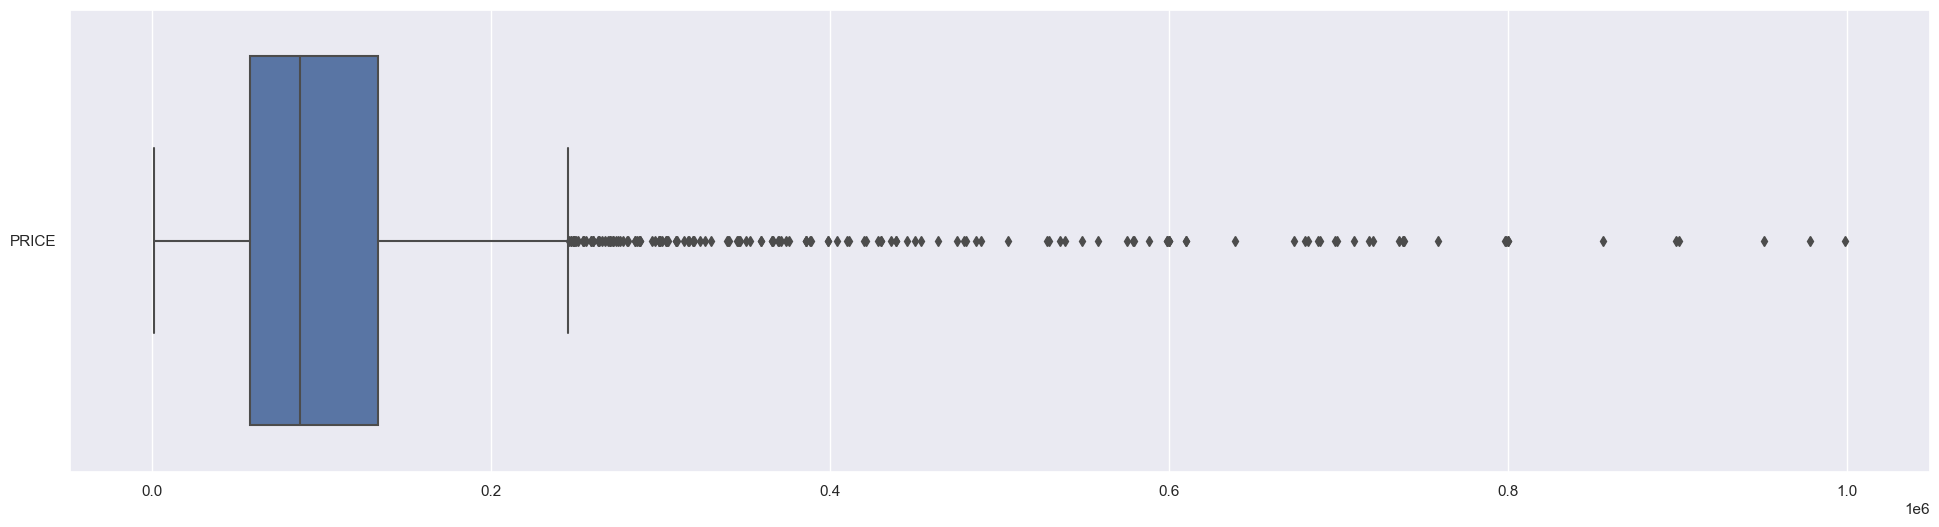

In [64]:
f=plt.figure(figsize=(24,6))
sb.boxplot(data=price, orient ='h')

<Axes: ylabel='Count'>

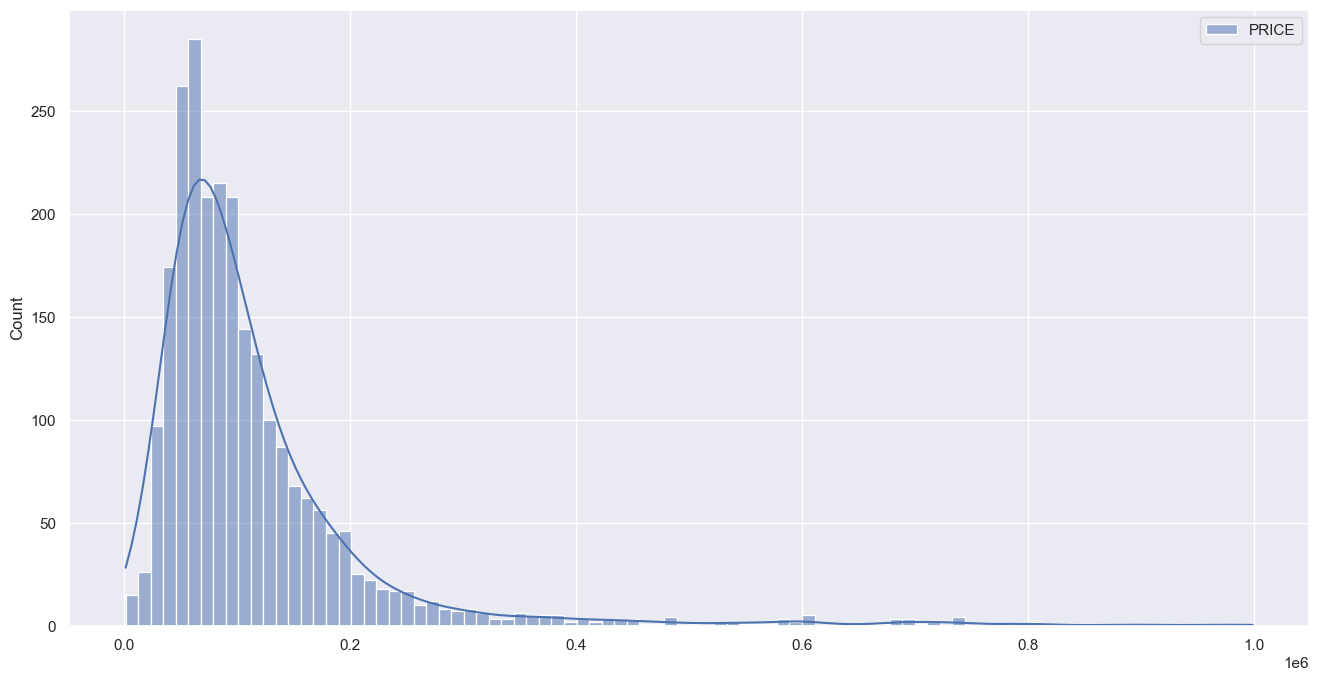

In [65]:
f= plt.figure(figsize=(16,8))
sb.histplot(data=price, kde=True)

In [67]:
numDF = car_data.select_dtypes(include= ['float','int64'])
numDF.describe()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_PER_YEAR,CURB_WEIGHT_KG,NO_OF_OWNERS,TRANSMISSION
count,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000
mean,114874.815204,21503.295592,85163.056207,48601.033967,1643.932875,7.817630,50552.886373,41243.758593,48736.252729,1959.168217,1354.379701,1487.202992,2.047311,0.987465
std,105711.416479,18488.745972,44365.036101,19051.375309,786.441768,3.750553,58256.089894,47126.655291,71559.649483,809.486308,1238.184249,273.505943,1.238452,0.111280
min,1050.000000,9550.000000,10.000000,8501.000000,2.000000,1.000000,2384.000000,8264.000000,863.000000,659.000000,50.000000,840.000000,1.000000,0.000000
25%,57800.000000,14300.000000,54000.000000,35906.000000,1002.000000,5.000000,22978.000000,19589.000000,17853.000000,1496.000000,684.000000,1295.000000,1.000000,1.000000
50%,86888.000000,16790.000000,84000.000000,46667.000000,1557.000000,7.000000,34116.000000,28714.000000,30253.000000,1796.000000,1110.000000,1455.000000,2.000000,1.000000
75%,133000.000000,21900.000000,115000.000000,55001.000000,2225.000000,9.000000,56217.000000,43203.000000,50495.000000,1998.000000,1266.000000,1626.000000,3.000000,1.000000
max,998899.000000,319820.000000,304000.000000,146002.000000,3563.000000,20.000000,935423.000000,683397.000000,980594.000000,6749.000000,10725.000000,2819.000000,6.000000,1.000000


<Axes: >

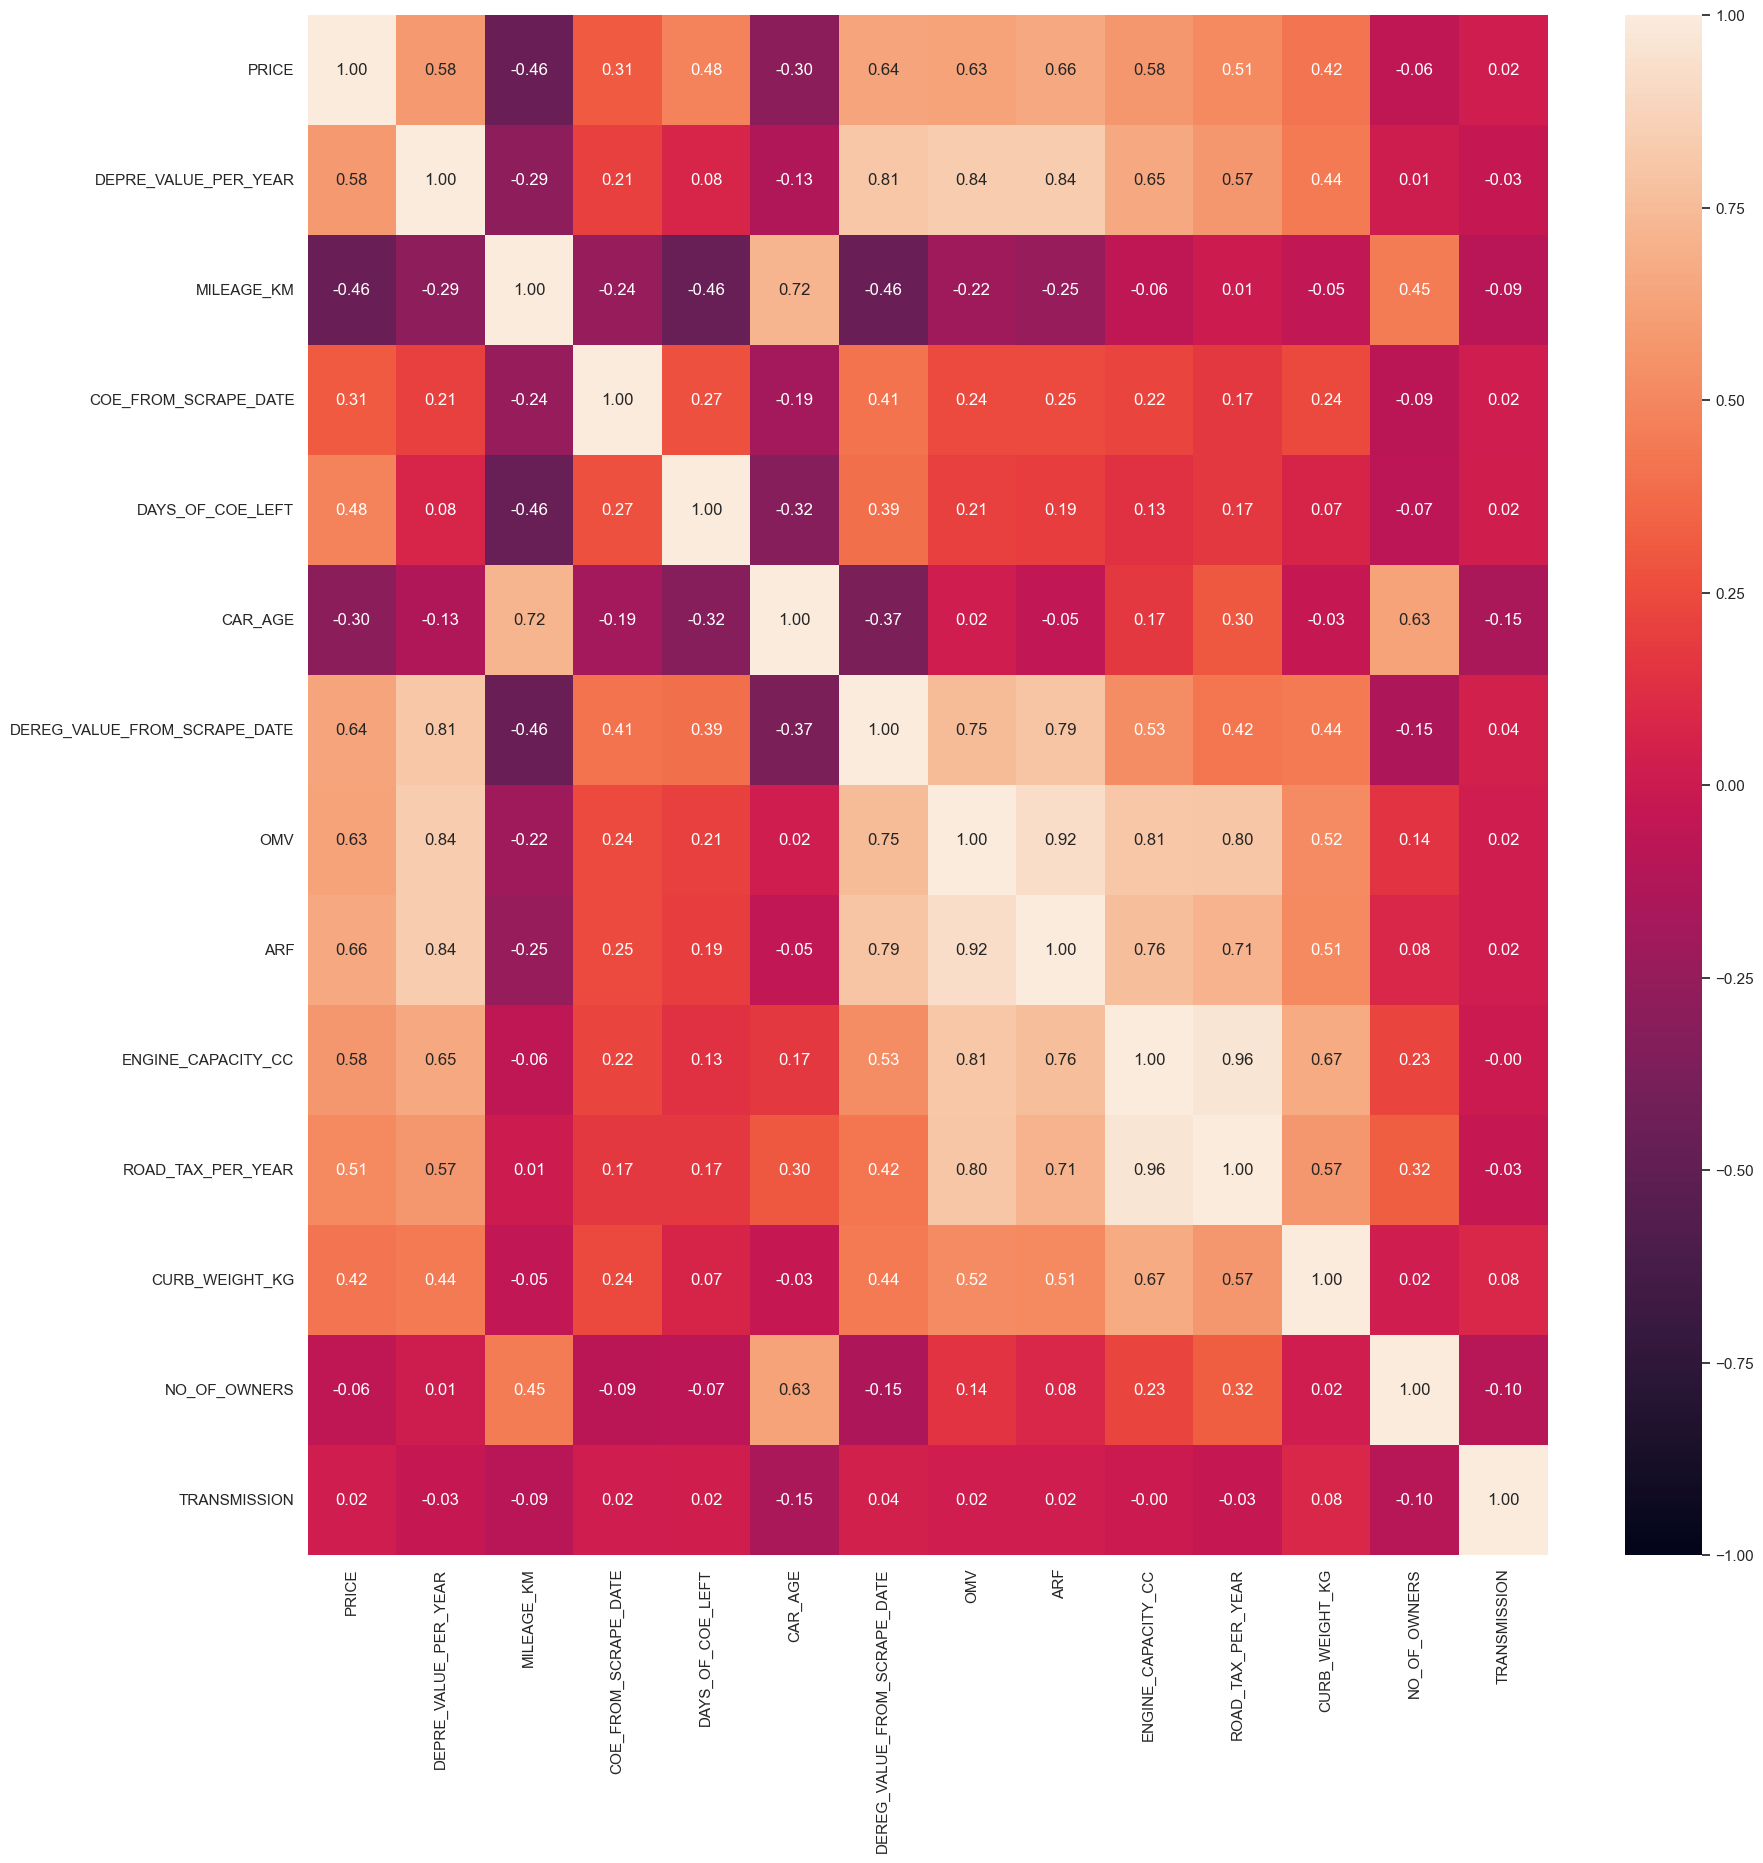

In [68]:
f = plt.figure(figsize=(20,20))
sb.heatmap(numDF.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

From here we can see that OMV and ARF have a very high correlation (0.92) which is easily explained as ARF is calculated based on a percentage of OMV. We also observe that ENGINE_CAPACITY_CC and ROAD_TAX_PER_YEAR has a high correlation (0.96) since road tax is derived from engine capacity. As such, they would be explaining the same thing as predictor variables. Thus, we can drop some of these variables.


<Axes: >

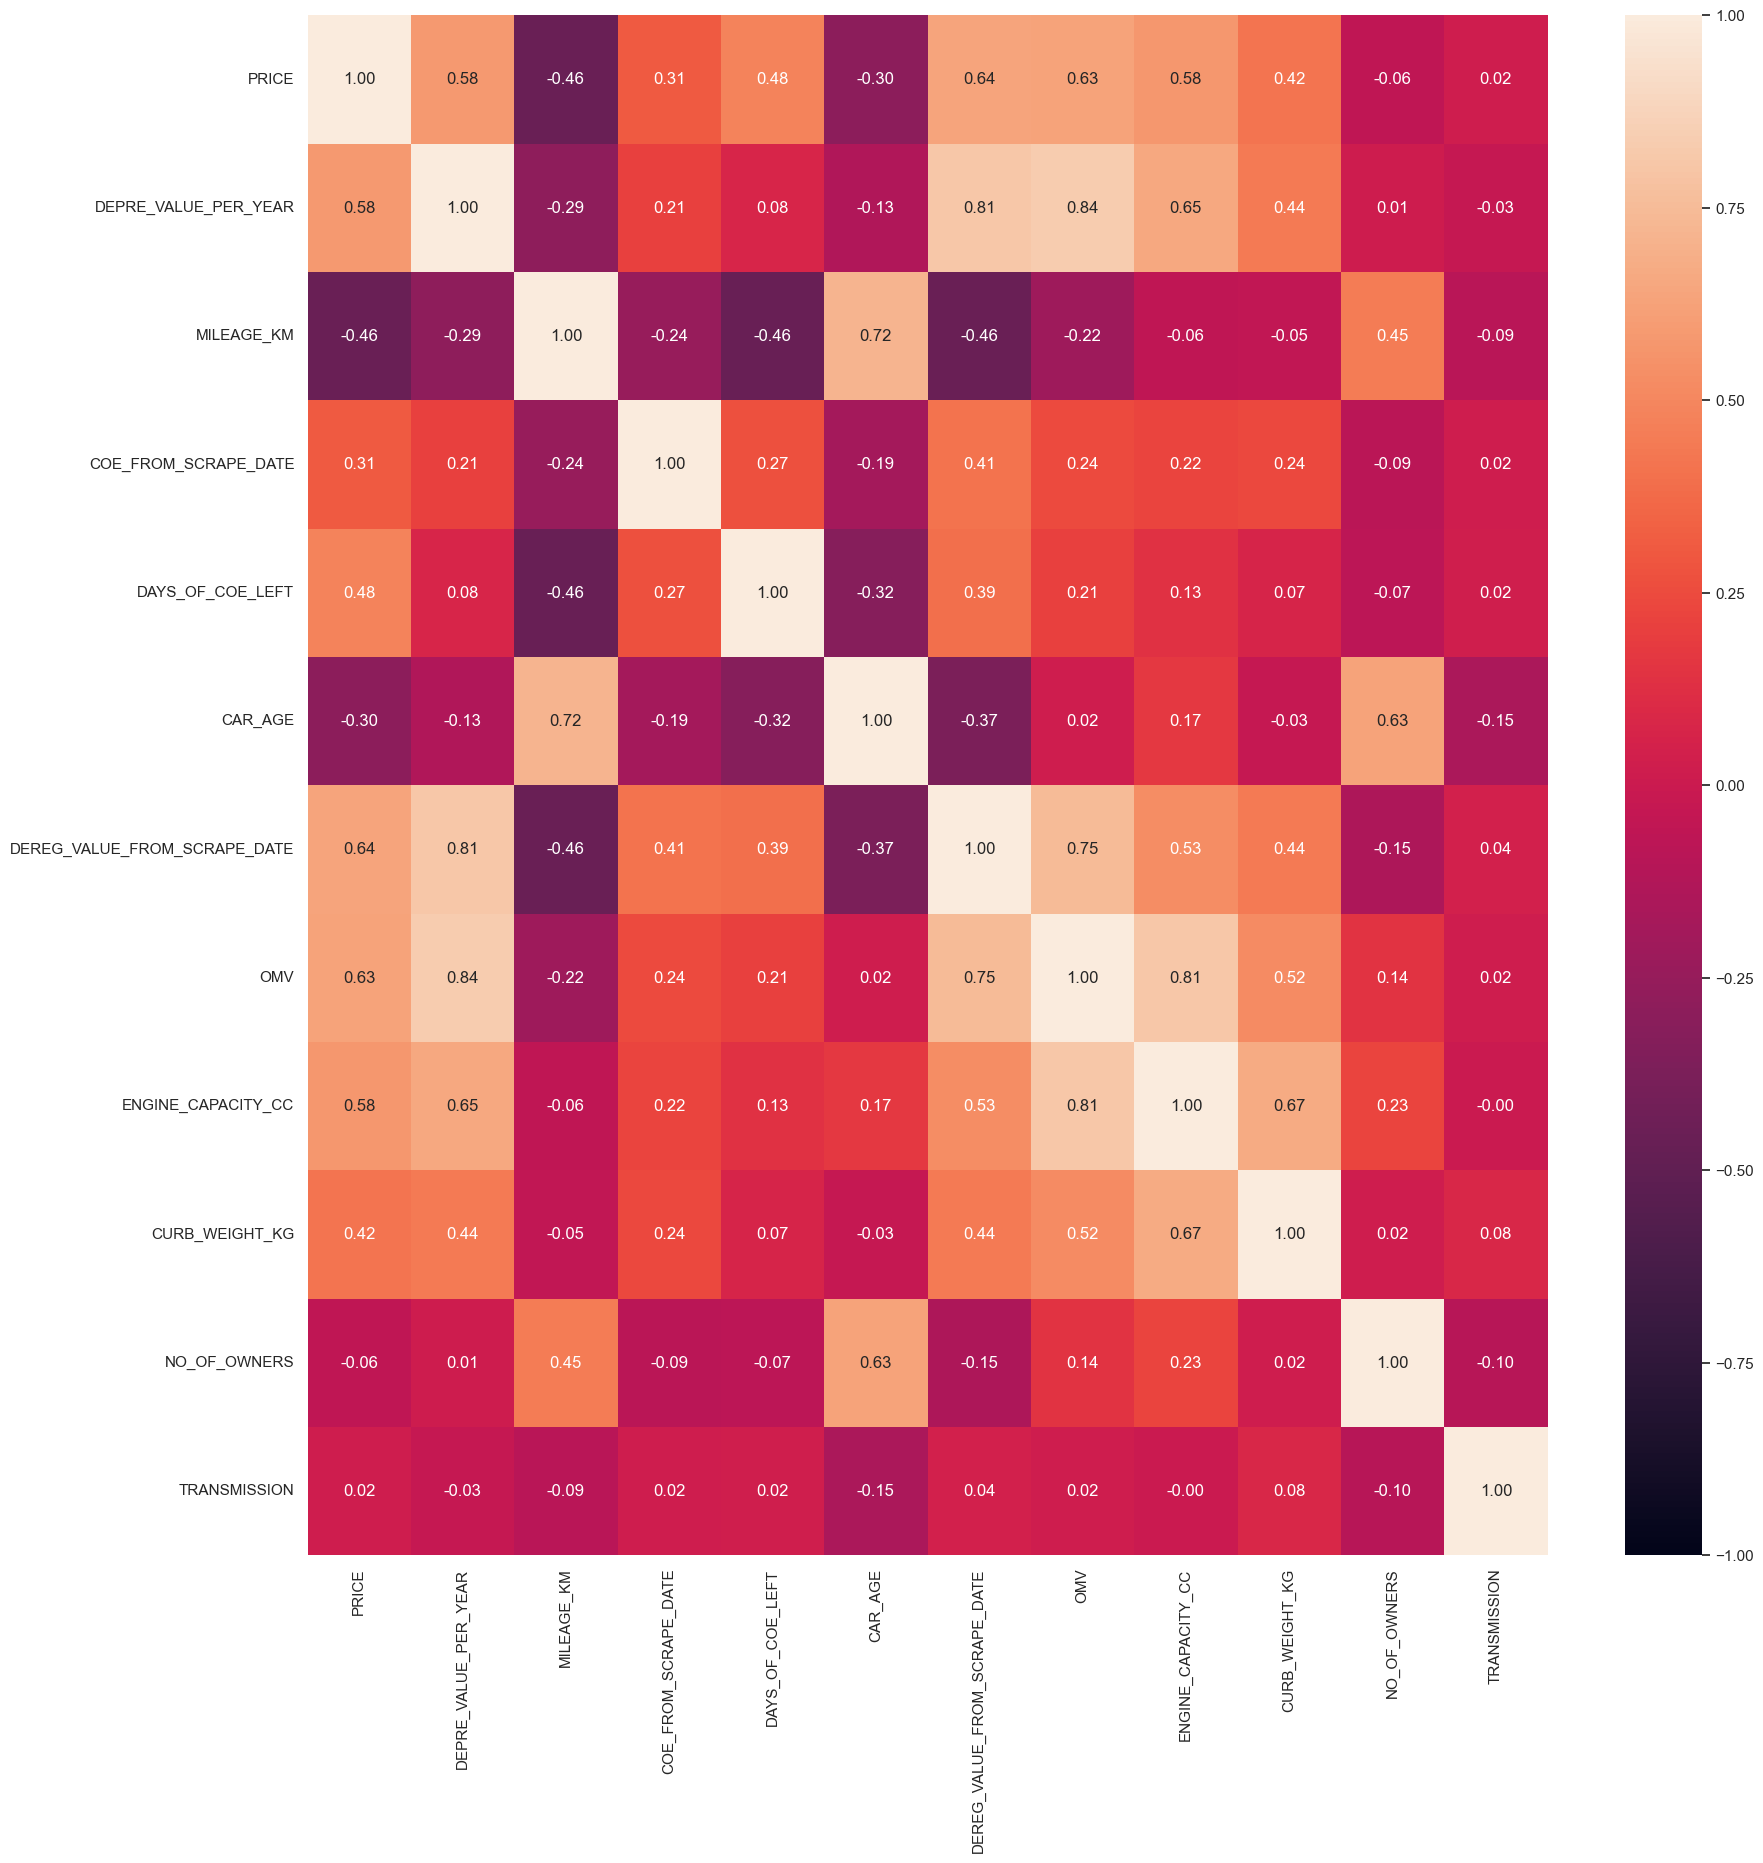

In [69]:
clean_df = numDF.drop(columns = ['ARF','ROAD_TAX_PER_YEAR'])
f = plt.figure(figsize = (20,20))
sb.heatmap(clean_df.corr(), vmin=-1,vmax=1,annot=True,fmt=".2f")

C:\Users\tayka\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


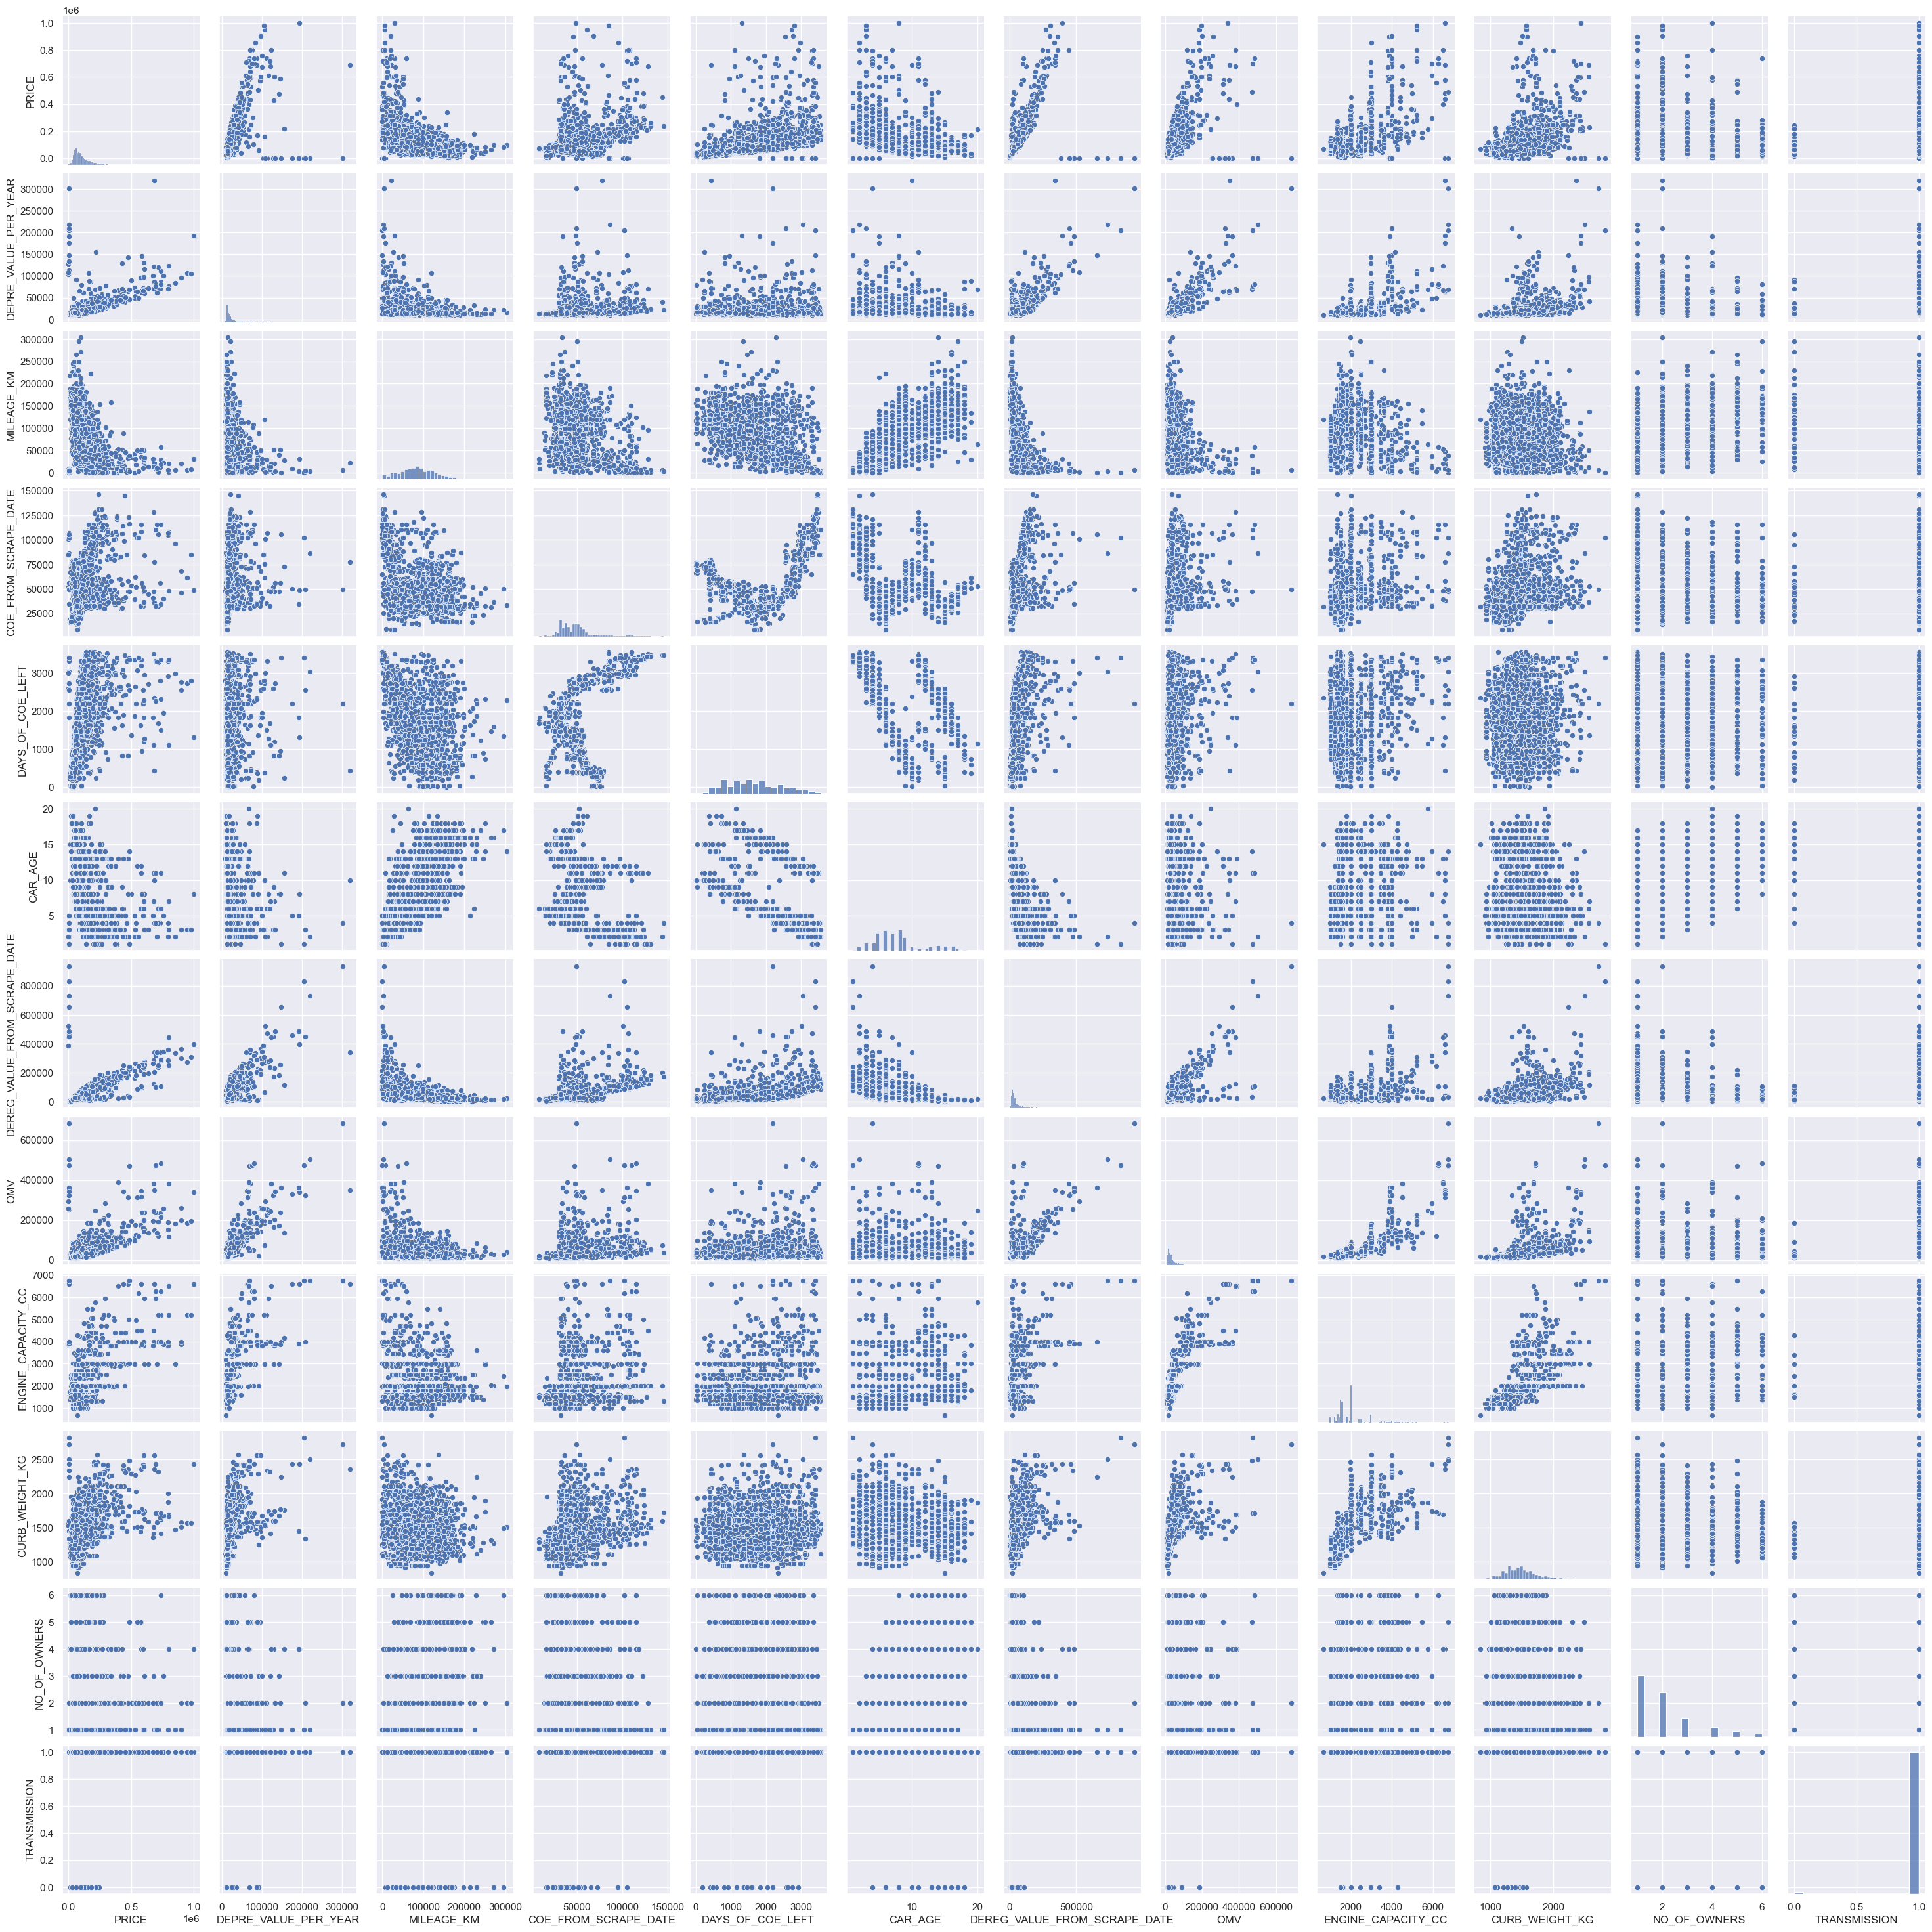

In [70]:
sb.pairplot(data=clean_df)

In [71]:
clean_df['LOG_PRICE'] = np.log10(clean_df['PRICE'])
clean_df.head()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,TRANSMISSION,LOG_PRICE
0,92888.0,16350.0,75333.0,31101.0,1735.0,6.0,34590.0,25699.0,1499.0,1490.0,1.0,1,4.967960
1,45800.0,16300.0,77000.0,46651.0,730.0,8.0,25170.0,24571.0,1498.0,1589.0,2.0,1,4.660865
2,64800.0,13090.0,161163.0,25727.0,1499.0,16.0,12737.0,20211.0,1595.0,1220.0,1.0,1,4.811575
4,87777.0,15290.0,109000.0,31302.0,1679.0,6.0,38569.0,30333.0,1991.0,1644.0,2.0,1,4.943381
5,44600.0,14730.0,105500.0,47300.0,763.0,8.0,26068.0,24806.0,1498.0,1589.0,1.0,1,4.649335


<Axes: xlabel='LOG_PRICE', ylabel='Count'>

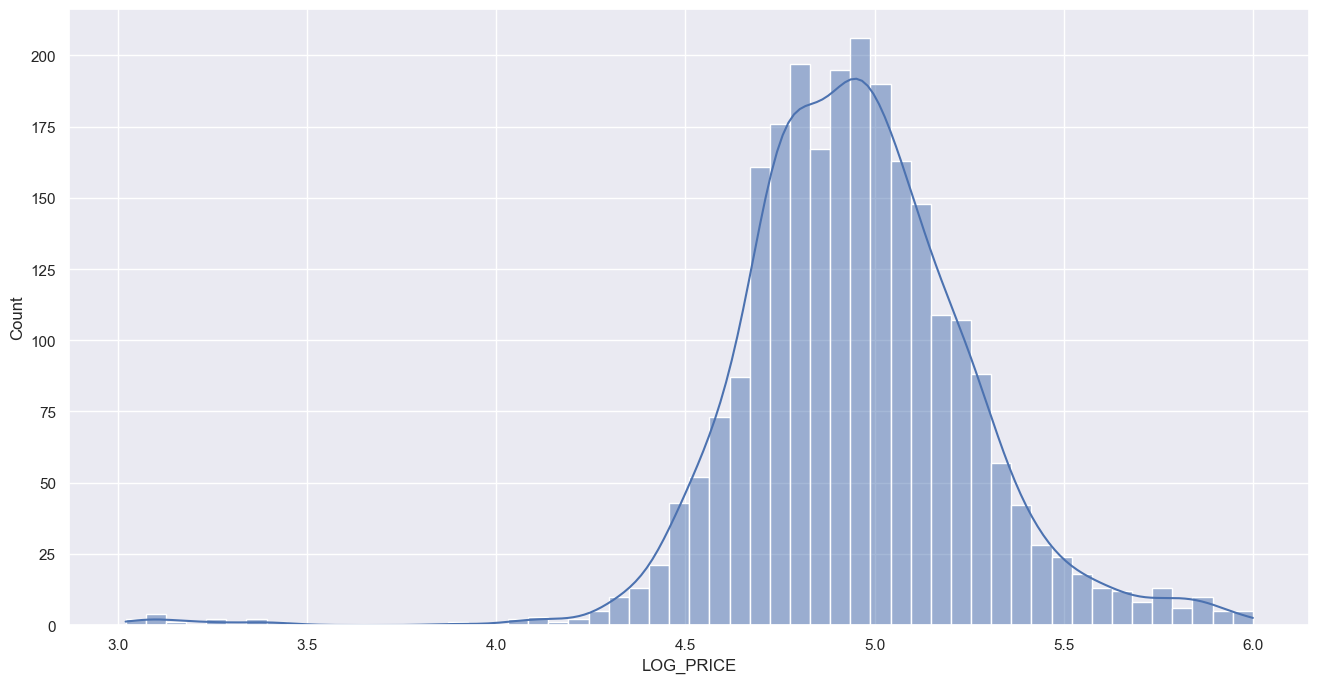

In [72]:
clean_df.drop(columns=['PRICE'])
f= plt.figure(figsize=(16,8))
sb.histplot(data=clean_df['LOG_PRICE'], kde=True)

In [73]:
clean_df.head()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,TRANSMISSION,LOG_PRICE
0,92888.0,16350.0,75333.0,31101.0,1735.0,6.0,34590.0,25699.0,1499.0,1490.0,1.0,1,4.967960
1,45800.0,16300.0,77000.0,46651.0,730.0,8.0,25170.0,24571.0,1498.0,1589.0,2.0,1,4.660865
2,64800.0,13090.0,161163.0,25727.0,1499.0,16.0,12737.0,20211.0,1595.0,1220.0,1.0,1,4.811575
4,87777.0,15290.0,109000.0,31302.0,1679.0,6.0,38569.0,30333.0,1991.0,1644.0,2.0,1,4.943381
5,44600.0,14730.0,105500.0,47300.0,763.0,8.0,26068.0,24806.0,1498.0,1589.0,1.0,1,4.649335


### LINEAR REGRESSION

In [74]:
y= pd.DataFrame(clean_df['PRICE'])
x= pd.DataFrame(clean_df[['DEPRE_VALUE_PER_YEAR','MILEAGE_KM','DEREG_VALUE_FROM_SCRAPE_DATE','OMV','COE_FROM_SCRAPE_DATE','DAYS_OF_COE_LEFT','CAR_AGE','ENGINE_CAPACITY_CC','CURB_WEIGHT_KG','NO_OF_OWNERS','TRANSMISSION']])

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

print("Train Set: ", y_train.shape, x_train.shape)
print("Test Set: ", y_test.shape, x_test.shape)

Train Set:  (1978, 1) (1978, 11)
Test Set:  (495, 1) (495, 11)


In [76]:
x_train.describe()

,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,CAR_AGE,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,TRANSMISSION
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000
mean,21832.775531,84472.365521,51534.253792,41609.960061,48536.985844,1657.045501,7.809403,1963.861982,1487.537917,2.059656,0.987867
std,19696.792439,44131.010234,60349.717365,46881.573698,19224.175069,782.766686,3.785548,812.538747,272.422113,1.241452,0.109509
min,9550.000000,18.000000,2497.000000,8264.000000,8501.000000,6.000000,1.000000,659.000000,840.000000,1.000000,0.000000
25%,14312.500000,52939.250000,23129.500000,19654.750000,35992.500000,1006.250000,5.000000,1496.000000,1295.000000,1.000000,1.000000
50%,16775.000000,84000.000000,34322.500000,28953.000000,46495.500000,1584.000000,7.000000,1797.000000,1452.500000,2.000000,1.000000
75%,22110.000000,114000.000000,56464.000000,44363.000000,54405.000000,2274.500000,9.000000,1998.000000,1630.000000,3.000000,1.000000
max,319820.000000,304000.000000,935423.000000,683397.000000,146002.000000,3563.000000,20.000000,6749.000000,2819.000000,6.000000,1.000000


In [77]:
y_train.describe()

,PRICE
count,1978.000000
mean,116085.047523
std,105707.537007
min,1050.000000
25%,58800.000000
50%,88194.000000
75%,134800.000000
max,998899.000000


In [78]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train,y_train)

print("Intercept of Regression\t: b = ",linreg.intercept_)
print("Coefficients of Regression\t: a = ", linreg.coef_)
print()

pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])),columns=["Predictors","Coefficients"])

Intercept of Regression	: b =  [-33563.04871451]
Coefficients of Regression	: a =  [[ 1.52344386e+00 -3.21153684e-01 -1.53445290e-01  6.64322739e-02
   2.70924603e-01  3.97974485e+01 -4.81335637e+03  4.26543903e+01
   2.54159220e+01  3.18466049e+03 -2.12389518e+04]]



,Predictors,Coefficients
0,DEPRE_VALUE_PER_YEAR,1.523444
1,MILEAGE_KM,-0.321154
2,DEREG_VALUE_FROM_SCRAPE_DATE,-0.153445
3,OMV,0.066432
4,COE_FROM_SCRAPE_DATE,0.270925
5,DAYS_OF_COE_LEFT,39.797448
6,CAR_AGE,-4813.356367
7,ENGINE_CAPACITY_CC,42.654390
8,CURB_WEIGHT_KG,25.415922
9,NO_OF_OWNERS,3184.660486


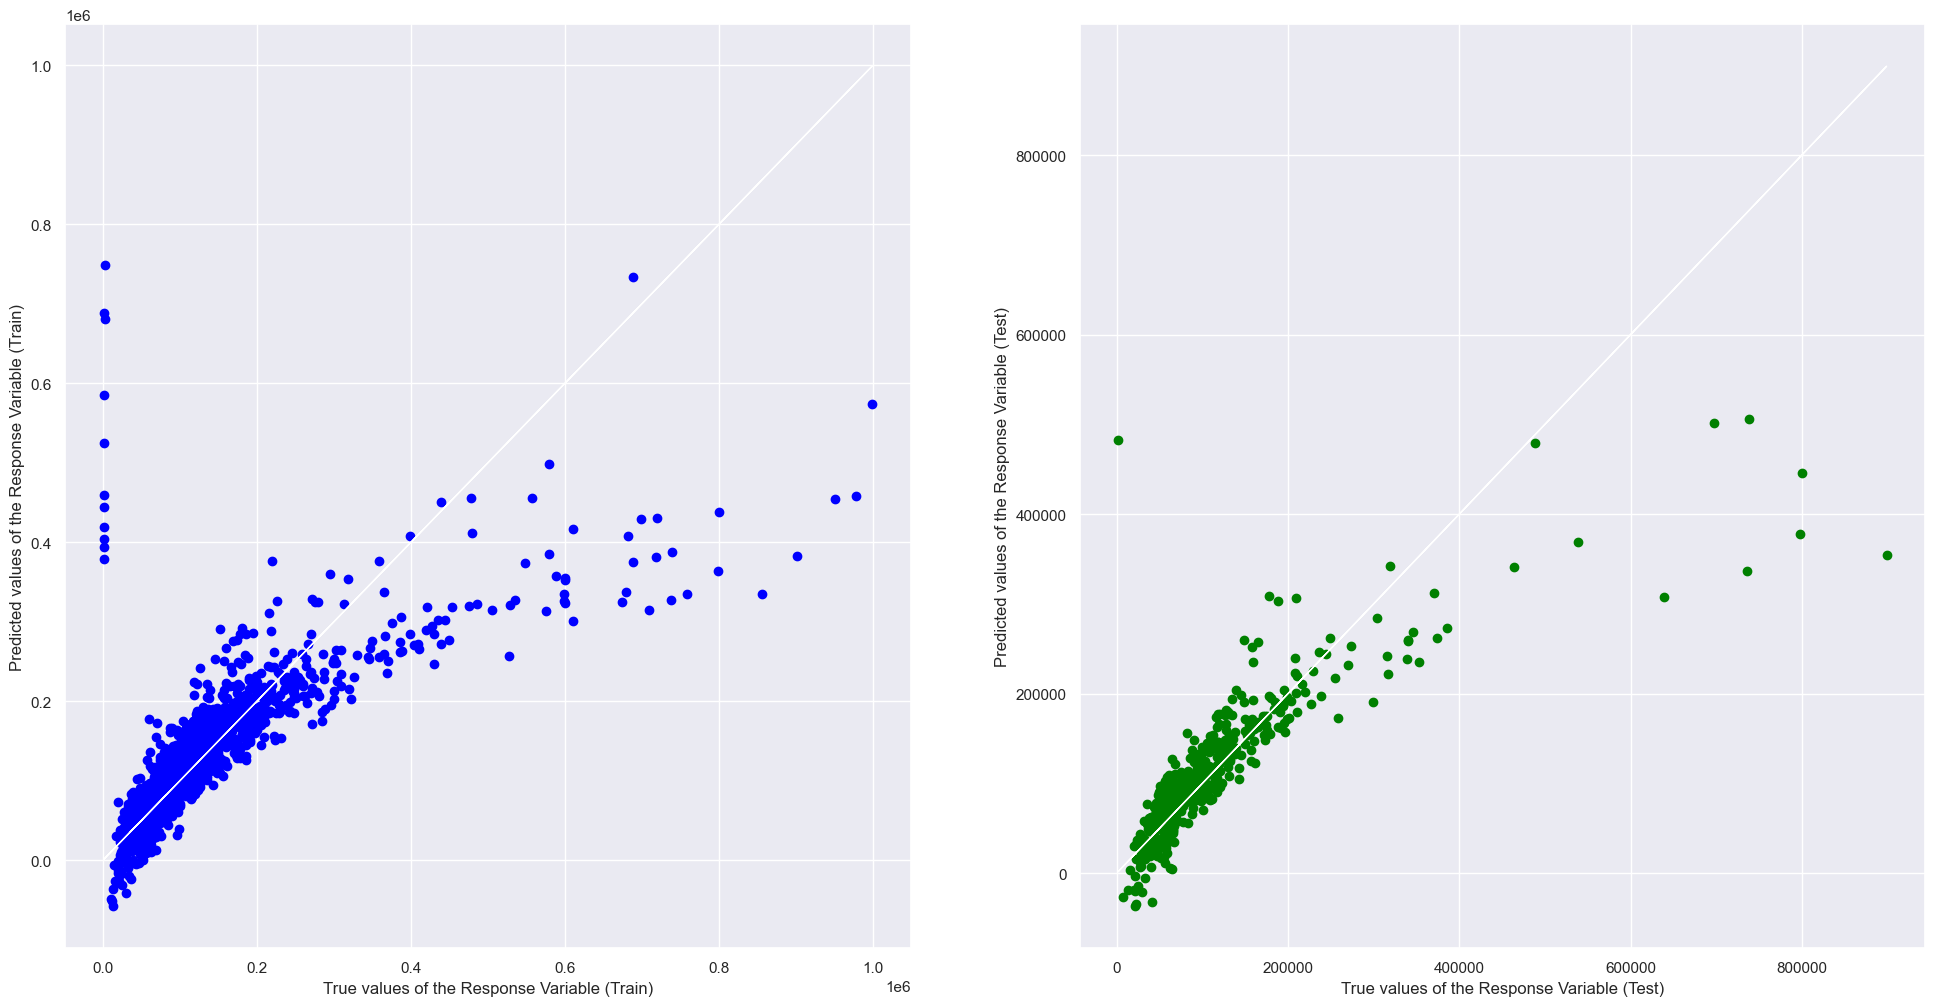

In [79]:
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

f, axes = plt.subplots(1,2,figsize=(24,12))
axes[0].scatter(y_train,y_train_pred, color="blue")
axes[0].plot(y_train,y_train,'w-',linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred,color="green")
axes[1].plot(y_test,y_test,'w-',linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:",linreg.score(x_train,y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(y_train,y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5977168784401613
Mean Squared Error (MSE) 	: 4492872571.884096

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6972358300705057
Mean Squared Error (MSE) 	: 3375499373.903444



### Linear regression on Depre value per year

In [81]:
b= pd.DataFrame(clean_df['DEPRE_VALUE_PER_YEAR'])
a= pd.DataFrame(clean_df[['MILEAGE_KM','DEREG_VALUE_FROM_SCRAPE_DATE','OMV','COE_FROM_SCRAPE_DATE','DAYS_OF_COE_LEFT','CAR_AGE','TRANSMISSION','ENGINE_CAPACITY_CC','CURB_WEIGHT_KG','NO_OF_OWNERS']])

In [82]:
from sklearn.model_selection import train_test_split

a_train, a_test, b_train, b_test = train_test_split(a,b,test_size=0.25)

print("Train Set :", b_train.shape, a_train.shape)
print("Test Set  :", b_test.shape, a_test.shape)

Train Set : (1854, 1) (1854, 10)
Test Set  : (619, 1) (619, 10)


In [83]:
b_train.describe()

,DEPRE_VALUE_PER_YEAR
count,1854.000000
mean,21760.765912
std,19848.193567
min,9550.000000
25%,14300.000000
50%,16775.000000
75%,21890.000000
max,319820.000000


In [84]:
a_train.describe()

,MILEAGE_KM,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,CAR_AGE,TRANSMISSION,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,85017.487055,51097.407228,41883.262136,48649.202805,1654.839266,7.861381,0.984358,1962.738943,1482.902373,2.074434
std,44810.656145,62033.217115,49482.401199,19153.717215,788.082660,3.791189,0.124119,833.705830,273.098247,1.263402
min,10.000000,2384.000000,8264.000000,8556.000000,2.000000,1.000000,0.000000,659.000000,840.000000,1.000000
25%,53000.000000,22879.750000,19589.000000,35906.000000,1096.000000,5.000000,1.000000,1496.000000,1288.250000,1.000000
50%,84000.000000,33806.000000,28636.000000,46689.000000,1581.000000,7.000000,1.000000,1600.000000,1443.000000,2.000000
75%,115000.000000,56277.750000,43142.250000,54915.250000,2225.000000,9.000000,1.000000,1998.000000,1625.000000,3.000000
max,295000.000000,935423.000000,683397.000000,146002.000000,3563.000000,20.000000,1.000000,6749.000000,2819.000000,6.000000


In [85]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(a_train,b_train)

print("Intercept of Regression\t: b = ",linreg.intercept_)
print("Coefficients of Regression\t: a = ", linreg.coef_)
print()

pd.DataFrame(list(zip(a_train.columns, linreg.coef_[0])),columns=["Predictors","Coefficients"])

Intercept of Regression	: b =  [31087.20634539]
Coefficients of Regression	: a =  [[-3.83127297e-02  1.87843883e-01  1.64293815e-01 -7.92781194e-02
  -6.44248456e+00  7.80464872e+01 -8.26017741e+03  1.69868131e+00
  -2.97253183e+00  2.70307664e+02]]



,Predictors,Coefficients
0,MILEAGE_KM,-0.038313
1,DEREG_VALUE_FROM_SCRAPE_DATE,0.187844
2,OMV,0.164294
3,COE_FROM_SCRAPE_DATE,-0.079278
4,DAYS_OF_COE_LEFT,-6.442485
5,CAR_AGE,78.046487
6,TRANSMISSION,-8260.177408
7,ENGINE_CAPACITY_CC,1.698681
8,CURB_WEIGHT_KG,-2.972532
9,NO_OF_OWNERS,270.307664


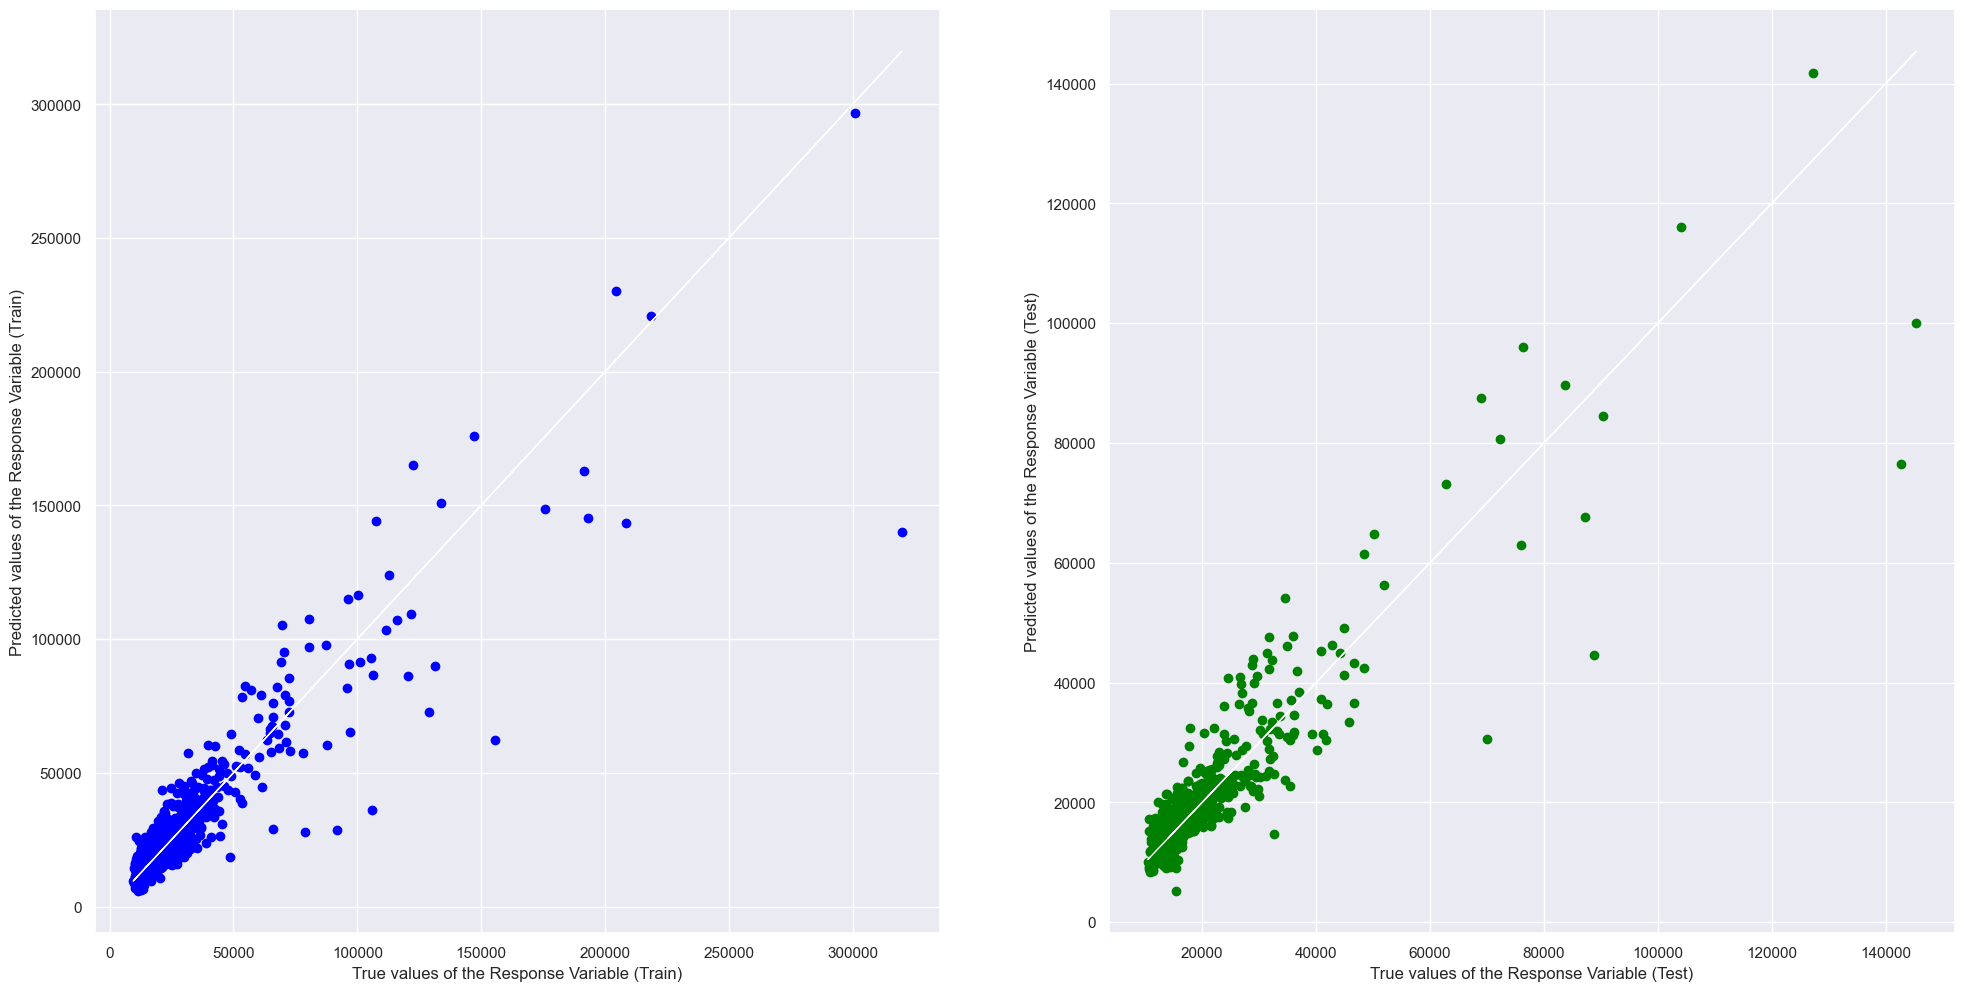

In [86]:
b_train_pred = linreg.predict(a_train)
b_test_pred = linreg.predict(a_test)

f, axes = plt.subplots(1,2,figsize=(24,12))
axes[0].scatter(b_train,b_train_pred, color="blue")
axes[0].plot(b_train,b_train,'w-',linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(b_test, b_test_pred,color="green")
axes[1].plot(b_test,b_test,'w-',linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:",linreg.score(a_train,b_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(b_train,b_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(a_test, b_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(b_test, b_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8454070714880153
Mean Squared Error (MSE) 	: 60869157.00711671

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8054871367760765
Mean Squared Error (MSE) 	: 35989953.555079065

